<a href="https://colab.research.google.com/github/Yurakc/platzi_data/blob/main/Aprendizaje%20Autom%C3%A1tico%20y%20Miner%C3%ADa%20De%20Datos/sesion%205/Naive_Bayes_Spam_Ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
spam_ham= pd.read_csv("spam_or_not_spam.csv")
spam_ham.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [ ]:
type(spam_ham)

pandas.core.frame.DataFrame

In [ ]:
spam_ham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [ ]:
spam_ham.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
spam_ham['email'].isnull().sum()

1

In [ ]:
spam_ham= spam_ham.dropna(how='any',axis=0)
spam_ham.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   2999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.3+ KB


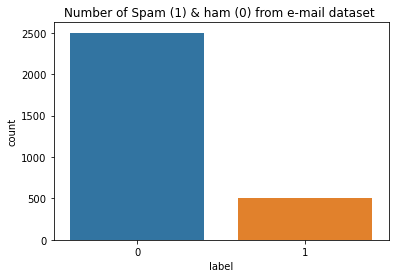

In [ ]:
sns.countplot(x='label', data = spam_ham)
plt.title('Number of Spam (1) & ham (0) from e-mail dataset ')
plt.show()

In [ ]:
spam_ham['label'].count()

2999

In [ ]:
X= spam_ham.email
y= spam_ham.label
#X=numpy_array[:,0]
#y=numpy_array[:,1]
#y = y.astype('int')
print("X")
print(X)
print("y")
print(y)

X
0        date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...
1       martin a posted tassos papadopoulos the greek ...
2       man threatens explosion in moscow thursday aug...
3       klez the virus that won t die already the most...
4        in adding cream to spaghetti carbonara which ...
                              ...                        
2995     abc s good morning america ranks it the NUMBE...
2996     hyperlink hyperlink hyperlink let mortgage le...
2997     thank you for shopping with us gifts for all ...
2998     the famous ebay marketing e course learn to s...
2999     hello this is chinese traditional 子 件 NUMBER世...
Name: email, Length: 2999, dtype: object
y
0       0
1       0
2       0
3       0
4       0
       ..
2995    1
2996    1
2997    1
2998    1
2999    1
Name: label, Length: 2999, dtype: int64


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100)
X_train


619     at NUMBER NUMBER am NUMBER on NUMBER NUMBER NU...
1107    once upon a time chris wrote on tue NUMBER NUM...
1745     after my latest cvs up timtest fails with tra...
1329    update of cvsroot spamassassin spamassassin de...
1401    good day fox on fri NUMBER aug NUMBER fox wrot...
                              ...                        
1930    url URL date not supplied tony davis wrote in ...
79      if i have any rpms in URL that could be useful...
1859    url URL date mon NUMBER sep NUMBER NUMBER NUMB...
2840    dear sir madam wishing you a wonderful day wit...
1544     please feel free to forward this message to o...
Name: email, Length: 2249, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect= CountVectorizer(stop_words="english")
vect.fit(X_train)

# printing the Vocabulary texts

print(vect.vocabulary_)

{'number': 15129, 'rodent': 19380, 'unusual': 23831, 'size': 20687, 'wrote': 25013, 'smartgroups': 20840, 'think': 22651, 'dave': 5397, 'farber': 8037, 'interesting': 11367, 'people': 16604, 'list': 12851, 'just': 11964, 'went': 24634, 'http': 10503, 'www': 25031, 'listbox': 12852, 'com': 4188, 'cheers': 3699, 'rah': 18202, 'hettinga': 10174, 'mailto': 13270, 'ibuc': 10642, 'internet': 11394, 'bearer': 2080, 'underwriting': 23604, 'corporation': 4833, 'url': 23905, 'farquhar': 8051, 'street': 21665, 'boston': 2681, 'ma': 13165, 'usa': 23911, 'deserve': 5821, 'respect': 19059, 'usefulness': 23924, 'antiquity': 1143, 'predicting': 17408, 'end': 7188, 'world': 24936, 'agreeable': 665, 'experience': 7796, 'edward': 6901, 'gibbon': 9220, 'decline': 5521, 'fall': 8000, 'roman': 19411, 'empire': 7122, 'time': 22783, 'chris': 3784, 'tue': 23318, 'matthias': 13551, 'saou': 19752, 'hi': 10182, 'll': 12899, 'leaving': 12532, 'evening': 7596, 'monday': 14191, 'access': 303, 'whatsoever': 24659, 's

In [ ]:
X_train.shape

(2249,)

In [ ]:
X_train_transformed= vect.transform(X_train)
X_test_transformed = vect.transform(X_test)
#print(X_train_transformed)
print(X_test_transformed)

  (0, 26)	2
  (0, 218)	1
  (0, 617)	63
  (0, 892)	2
  (0, 1338)	2
  (0, 1768)	3
  (0, 2955)	6
  (0, 2969)	3
  (0, 3618)	4
  (0, 3919)	1
  (0, 4215)	2
  (0, 4378)	3
  (0, 4403)	1
  (0, 4511)	4
  (0, 4524)	1
  (0, 4747)	3
  (0, 4973)	62
  (0, 5208)	1
  (0, 5210)	1
  (0, 5228)	1
  (0, 5514)	14
  (0, 5517)	16
  (0, 5602)	6
  (0, 5914)	1
  (0, 6003)	1
  :	:
  (748, 21993)	2
  (748, 22260)	1
  (748, 22374)	1
  (748, 22431)	1
  (748, 22972)	1
  (748, 23905)	3
  (748, 23916)	7
  (748, 23937)	1
  (748, 24070)	1
  (748, 24495)	9
  (748, 24834)	1
  (749, 1450)	1
  (749, 2870)	1
  (749, 5381)	1
  (749, 5971)	1
  (749, 8771)	1
  (749, 10312)	1
  (749, 11394)	1
  (749, 11631)	1
  (749, 12021)	1
  (749, 14833)	1
  (749, 15129)	6
  (749, 15424)	1
  (749, 17227)	1
  (749, 23905)	2


In [ ]:
#X_train_transformed=X_transformed.toarray()
X_train_transformed

<2249x25750 sparse matrix of type '<class 'numpy.int64'>'
	with 175100 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_transformed.shape

(2249, 25750)

In [ ]:
y_train

619     0
1107    0
1745    0
1329    0
1401    0
       ..
1930    0
79      0
1859    0
2840    1
1544    0
Name: label, Length: 2249, dtype: int64

In [ ]:
y_train.shape

(2249,)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
bnb=MultinomialNB()
bnb.fit(X_train_transformed, y_train)
proba= bnb.predict_proba(X_test_transformed)
y_pred= bnb.predict(X_test_transformed)

#Converting array to data frame
#proba = pd.DataFrame(proba)
#proba.tail()
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.988

In [ ]:
from sklearn import metrics
confusion= metrics.confusion_matrix(y_test, y_pred)
print(confusion)

[[633   1]
 [  8 108]]


In [ ]:
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred))

PRECISION SCORE : 0.9908256880733946
RECALL SCORE : 0.9310344827586207
F1 SCORE : 0.96


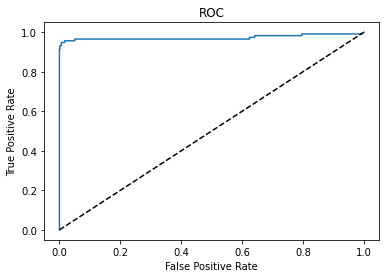

In [ ]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
# plotting the ROC curve


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

In [ ]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9729005765256175